In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import pandas as pd
cmd = os.path.dirname(sys.path[0])
print(cmd)
sys.path.append(os.path.join(cmd,"3DTomoGAN"))
sys.path.append(os.path.join(cmd,"Results"))
sys.path.append(r"C:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT\Plotting")
from plots import *

%reload_ext autoreload
%autoreload 2

c:\Users\Bruker\OneDrive\Dokumenter\NTNU\4D_CT


c:\Users\Bruker\anaconda3\envs\4D_CT\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
points = pd.read_csv(os.path.join(cmd,r"Results/Training","validation1.csv"), header=None, sep=";")
points = points.applymap(lambda x: str(x.replace(',','.')))

In [3]:
choose_formatter(False)

In [4]:
x = points[0].to_numpy(dtype=np.float32)
y = points[1].to_numpy(dtype=np.float32)

print(x.dtype)

float32


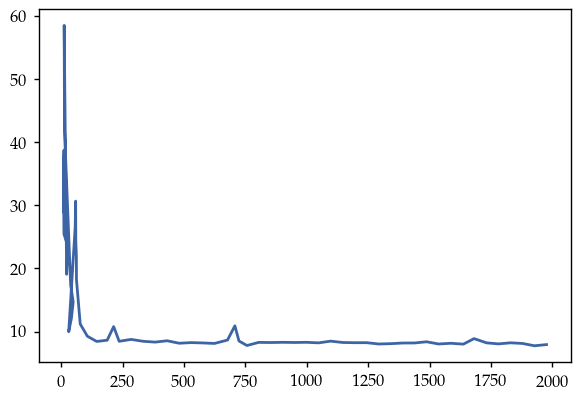

In [5]:
plt.plot(x,y)
plt.show()

In [19]:
# Basic1

folder = os.path.join(cmd,r"Results/Training","Basic1")
adv1 = np.load(os.path.join(folder,"adv_list.npy"))
mse1 = np.load(os.path.join(folder,"mse_list.npy"))
train1 = np.load(os.path.join(folder,"train_loss.npy"))
val1 = np.load(os.path.join(folder,"val_loss.npy"))
x1 = np.load(os.path.join(folder,"x_axis.npy"))

In [20]:
# log = pd.read_csv(os.path.join(cmd,r"Results/Training/Basic1","iter-prints.log"), header=None, sep=",")
import re
def read_iter_log(path):

    with open(path, "r") as f:
        log = f.readlines()

    log = [x for x in log if x!="\n"]
    content = pd.DataFrame(columns=["epoch", "gloss", "mse", "adv", "dloss"])

    def find_shit(string):
        e = re.findall(r"Epoch: \d+", string)[0]
        e = int(e[7:])
        gloss = re.findall("gloss: \d+.\d+", string)[0]
        gloss = float(gloss[7:])
        mse = re.findall("mse\d+.\d+", string)[0]
        mse = float(mse[3:])
        adv = re.findall("adv\d+.\d+", string)[0]
        adv = float(adv[3:])
        dloss = re.findall("dloss: \d+.\d+", string)[0]
        dloss = float(dloss[7:])
        return e, gloss, mse, adv, dloss

    def init_epoch(line_content):
        epoch = line_content[0]
        gloss = [line_content[1]]
        mse = [line_content[2]]
        adv = [line_content[3]]
        dloss = [line_content[4]]
        return epoch, gloss, mse, adv, dloss
    it =0
    while True:
        string = log[it]
        try:
            line_content = find_shit(string)
            break
        except:
            it+=1

    epoch = line_content[0]
    gloss = [line_content[1]]
    mse = [line_content[2]]
    adv = [line_content[3]]
    dloss = [line_content[4]]

    for i in range(1,len(log)):

        if "Epoch" not in log[i]:
            continue

        if "Validation" in log[i]:
            continue

        string = log[i]

        line_content = find_shit(string)

        if line_content[0] != epoch:

            gloss = np.mean(gloss)
            mse = np.mean(mse)
            adv = np.mean(adv)
            dloss = np.mean(dloss)

            content.loc[len(content.index)] = [epoch, gloss, mse, adv, dloss]

            epoch, gloss, mse, adv, dloss = init_epoch(line_content)
        else:
            gloss.append(line_content[1])
            mse.append(line_content[2])
            adv.append(line_content[3])
            dloss.append(line_content[4])

    return content

with open(os.path.join(cmd,r"Results/Training/Basic1","iter-prints.log"), "r") as f:
    log = f.readlines()

string = log[0]
e = re.findall(r"Epoch: \d+", string)[0]
e = int(e[7:])
print(e)

path = os.path.join(cmd,r"Results/Training/Basic1","iter-prints.log")

df = read_iter_log(path)


print(df)

0
    epoch       gloss        mse        adv  dloss
0     0.0   36.652500  30.261500   6.393000  1.345
1     1.0   18.616000  12.316600   6.300600  1.036
2     2.0   15.583333   9.142667   6.441333  0.910
3     3.0   23.500000  16.585000   6.914000  0.725
4     4.0   14.060000   6.800000   7.263000  0.690
..    ...         ...        ...        ...    ...
95   95.0  141.920000  89.077000  52.844000  0.010
96   96.0  138.330000  90.011000  48.317000  0.000
97   97.0   73.370000  19.223000  54.147000  0.000
98   98.0   77.330000  23.119000  54.209000  0.000
99   99.0   92.060000  36.047000  56.013000  0.000

[100 rows x 5 columns]


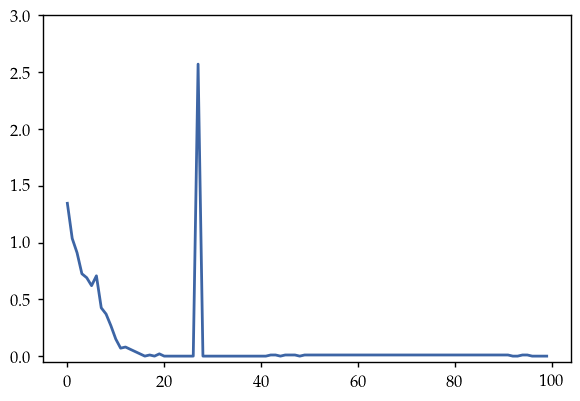

In [21]:
# plt.plot(df["epoch"], df["gloss"])
# plt.plot(df["epoch"], df["adv"])

loss = df["dloss"].to_numpy()
args = np.argwhere(loss <=20)
epochs = df["epoch"].to_numpy()[args]
gloss = df["gloss"].to_numpy()[args]
adv = df["adv"].to_numpy()[args]
dloss = df["dloss"].to_numpy()[args]


plt.plot(epochs, dloss)
plt.ylim([-0.05,3])
plt.show()

In [22]:
train1 = train1[np.where(train1 <= 1000)]
mse1 = mse1[np.where(mse1 <= 1000)]

In [23]:
f=1
mse1 = [np.mean(mse1[i-f:i+f]) for i in range(f,len(mse1)-f)]

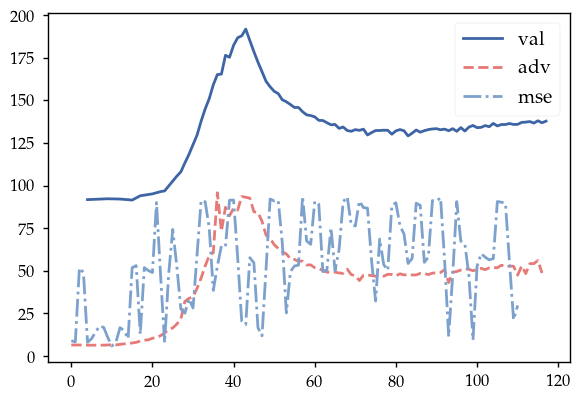

In [24]:
fig, ax = plt.subplots()
ax.plot(x1,val1, label="val")
ax.plot(adv1, label="adv")
# ax.plot(train1, label="train")
ax.plot(mse1, label="mse")
ax.legend()

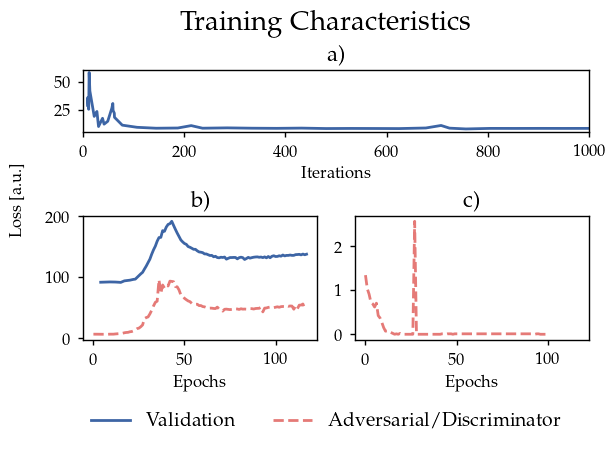

In [25]:
from matplotlib.gridspec import GridSpec
fig = plt.figure()
gs = GridSpec(3, 2, figure=fig, wspace=0, hspace=0.0)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1:, 0])
ax3 = fig.add_subplot(gs[1:, 1], sharex=ax2)

sorted = np.argsort(x)
x = x[sorted]
y = y[sorted]

ax1.plot(x,y, label="Initial Training Validation")
ax1.set_xlim([-0.1,1000])
ax1.set_xlabel("Iterations")
ax1.set_title("a)")

ax2.plot(x1,val1, label="Transferred Validation")
handle2, = ax2.plot(adv1)
ax2.set_xlabel("Epochs")
ax2.set_title("b)")

d_line, = ax3.plot(epochs, dloss, linestyle = handle2.get_linestyle(), c= handle2.get_color(),  label="Transferred Discriminator Loss")
ax3.set_xlabel("Epochs")
ax3.set_title("c)")
# d_line.update_from(handle2)


plt.suptitle("Training Characteristics")
fig.text(-0.04, 0.50, 'Loss [a.u.]', ha='center', va='center', rotation='vertical')

# ax1.legend()
# ax2.legend()
# ax3.legend()
handle1 = ax1.get_legend_handles_labels()[0]

labels = ["Validation", "Adversarial/Discriminator"]
fig.legend(handles=[handle1[0], handle2], labels=labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, -0.00), frameon=False)

# plt.savefig(os.path.join(cmd,r"Results/Training/","Training.pdf"), format="pdf", bbox_inches='tight')
plt.show()


In [26]:
optimGAN = read_iter_log(os.path.join(cmd,r"Results/GANPICCS","iter-prints.log"))

In [27]:
print(optimGAN)

    epoch  gloss    mse    adv  dloss
0     0.0   7.49  0.094  7.400   1.39
1     1.0   7.45  0.093  7.352   1.39
2     2.0   7.40  0.091  7.313   1.39
3     3.0   7.36  0.086  7.278   1.38
4     4.0   7.32  0.080  7.245   1.38
..    ...    ...    ...    ...    ...
95   95.0   6.83  0.001  6.832   1.39
96   96.0   6.77  0.000  6.772   1.39
97   97.0   6.77  0.000  6.767   1.39
98   98.0   6.81  0.001  6.807   1.39
99   99.0   6.88  0.001  6.879   1.39

[100 rows x 5 columns]


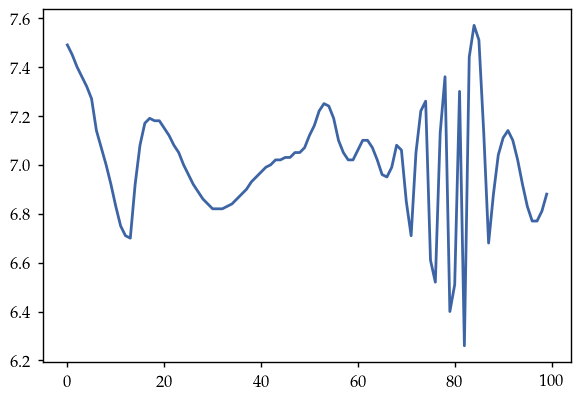

In [37]:
plt.plot(optimGAN["epoch"], optimGAN["gloss"])
# plt.plot(optimGAN["epoch"], optimGAN["dloss"])